In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load Data
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
## Checking Null values in dataset
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

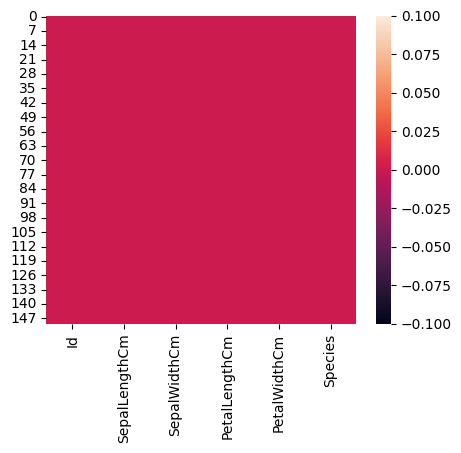

In [4]:
## checking null values using graph
plt.figure(figsize=(5, 4))
sns.heatmap(df.isnull())
plt.show()

In [5]:
## Dataset rows and columns
df.shape

(150, 6)

In [6]:
## dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
en_data = df[["Species"]]

In [9]:
pd.get_dummies(df["Species"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Iris-setosa      150 non-null    bool 
 1   Iris-versicolor  150 non-null    bool 
 2   Iris-virginica   150 non-null    bool 
dtypes: bool(3)
memory usage: 582.0 bytes


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder(drop="first")

In [12]:
ohe.fit(df[["Species"]])

,categories,'auto'
,drop,'first'
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [13]:
arr = ohe.transform(df[["Species"]]).toarray()

In [14]:
df = pd.concat(
    [df.drop('Species', axis=1), pd.DataFrame(arr, columns=["Iris-versicolor", "Iris-virginica"])],
    axis=1
)

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,0.0,0.0
1,2,4.9,3.0,1.4,0.2,0.0,0.0
2,3,4.7,3.2,1.3,0.2,0.0,0.0
3,4,4.6,3.1,1.5,0.2,0.0,0.0
4,5,5.0,3.6,1.4,0.2,0.0,0.0


In [16]:
## remove extra knowledge column like ID
df.drop(["Id"], axis=1, inplace= True)

In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


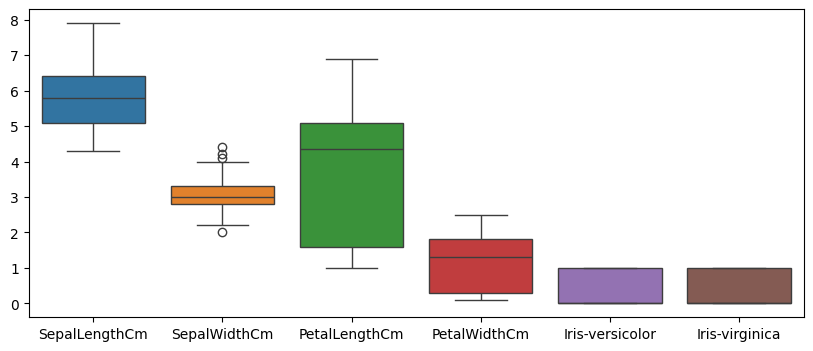

In [18]:
## Seeing all dataset of outliers in one picture using graph
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.show()

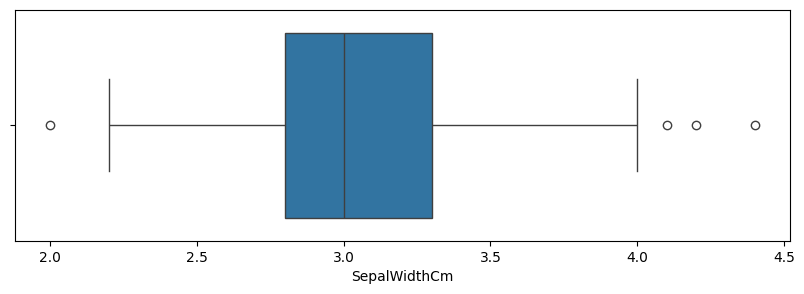

In [19]:
## finding outliers using graph
plt.figure(figsize=(10, 3))
sns.boxplot(x="SepalWidthCm", data=df)
plt.show()

## Note here you can its seems like outlier but if you remove it still it will appear as well.
#  because its mild outliers we can ignore them 


<Figure size 400x300 with 0 Axes>

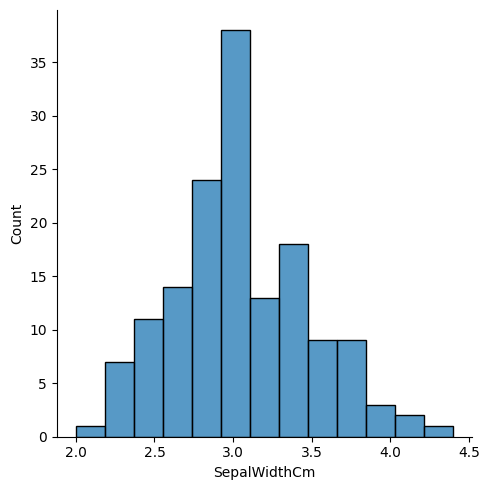

In [20]:
plt.figure(figsize=(4, 3))
sns.displot(x="SepalWidthCm", data=df)
plt.show()

In [21]:
print(df.corr())

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm         1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm         -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm         0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm          0.817954     -0.356544       0.962757      1.000000   
Iris-versicolor       0.079396     -0.464700       0.201587      0.118376   
Iris-virginica        0.638020     -0.130901       0.721102      0.769134   

                 Iris-versicolor  Iris-virginica  
SepalLengthCm           0.079396        0.638020  
SepalWidthCm           -0.464700       -0.130901  
PetalLengthCm           0.201587        0.721102  
PetalWidthCm            0.118376        0.769134  
Iris-versicolor         1.000000       -0.500000  
Iris-virginica         -0.500000        1.000000  


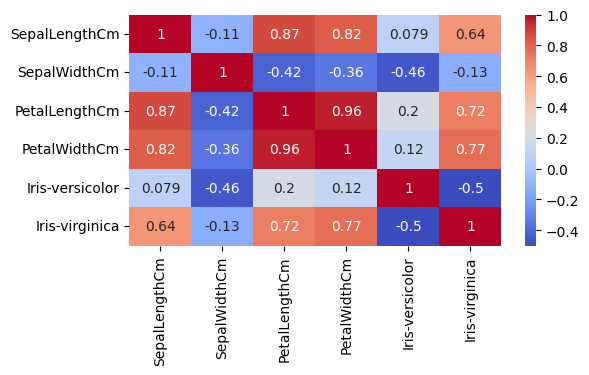

In [22]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [23]:
print(df.cov())

                 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm         0.685694     -0.039268       1.273682      0.516904   
SepalWidthCm         -0.039268      0.188004      -0.321713     -0.117981   
PetalLengthCm         1.273682     -0.321713       3.113179      1.296387   
PetalWidthCm          0.516904     -0.117981       1.296387      0.582414   
Iris-versicolor       0.031096     -0.095302       0.168233      0.042729   
Iris-virginica        0.249888     -0.026846       0.601790      0.277629   

                 Iris-versicolor  Iris-virginica  
SepalLengthCm           0.031096        0.249888  
SepalWidthCm           -0.095302       -0.026846  
PetalLengthCm           0.168233        0.601790  
PetalWidthCm            0.042729        0.277629  
Iris-versicolor         0.223714       -0.111857  
Iris-virginica         -0.111857        0.223714  


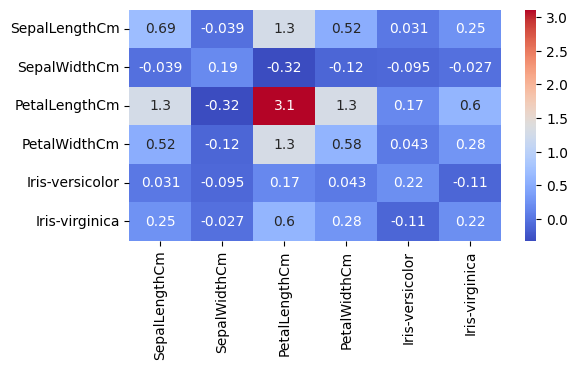

In [24]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.cov(), annot=True, cmap="coolwarm")
plt.show()

<Figure size 1600x1200 with 0 Axes>

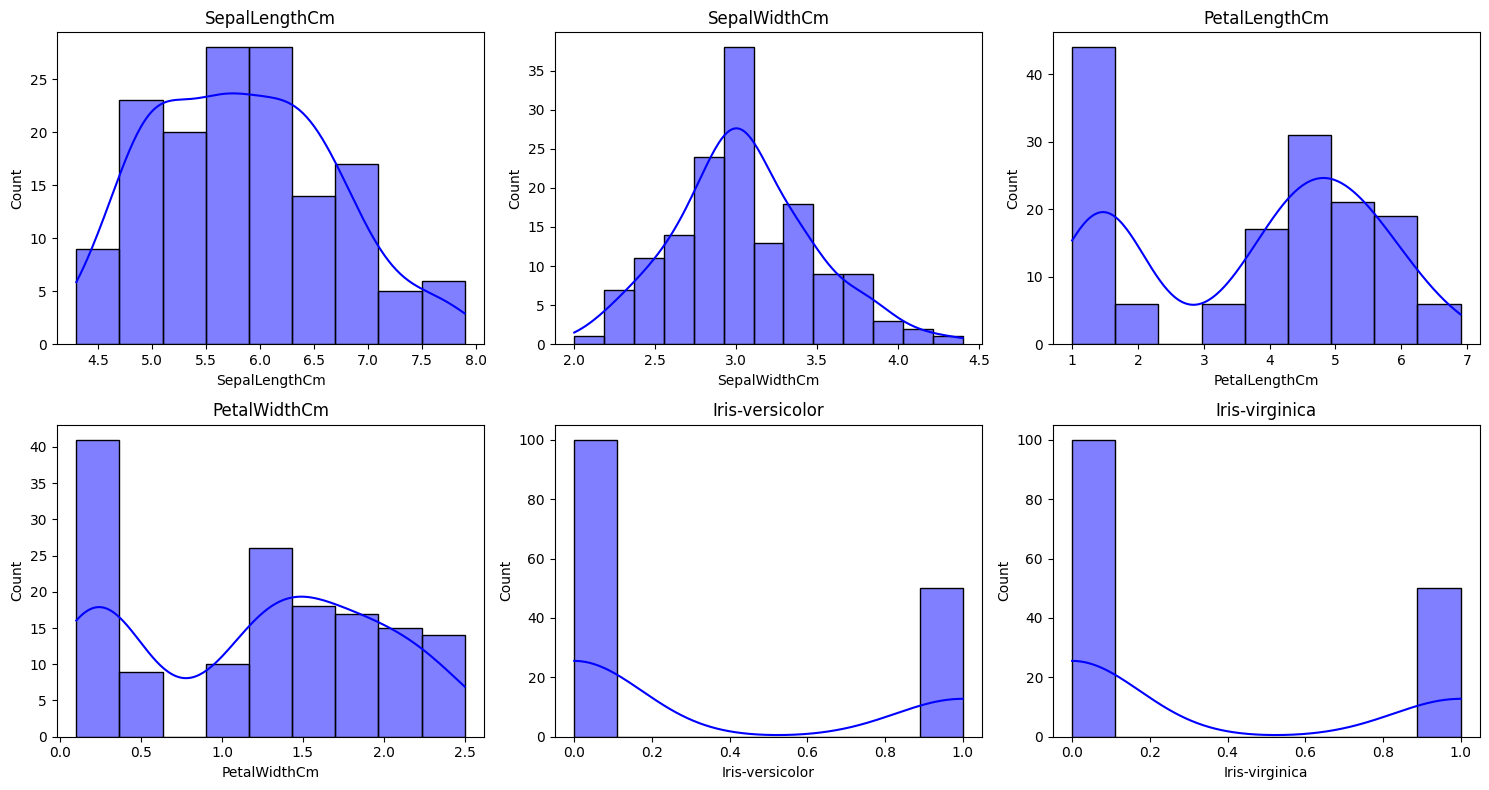

In [25]:
import math
plt.figure(figsize=(16, 12))
cols = df.select_dtypes(include="number").columns

total = len(cols)
rows = math.ceil(total/3)

plt.figure(figsize=(15, rows*4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Iris-versicolor', 'Iris-virginica'],
      dtype='object')

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_14884\2352911583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Iris-virginica'])


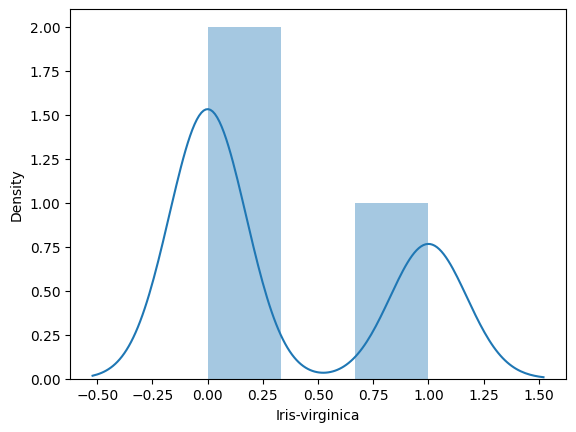

In [27]:
sns.distplot(df['Iris-virginica'])
plt.show()

## By using feature scalling 

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms = MinMaxScaler()

In [30]:
min_max_scale_data = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

In [31]:
mms.fit(df[min_max_scale_data])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [32]:
df[['SepalLengthCm_mms', 'PetalLengthCm_mms', 'PetalWidthCm_mms']] = mms.transform(df[min_max_scale_data])

In [33]:
## Here you can observe data has tranformed b/w 0 and 1
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica,SepalLengthCm_mms,PetalLengthCm_mms,PetalWidthCm_mms
0,5.1,3.5,1.4,0.2,0.0,0.0,0.222222,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0.0,0.0,0.166667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0.0,0.0,0.111111,0.050847,0.041667


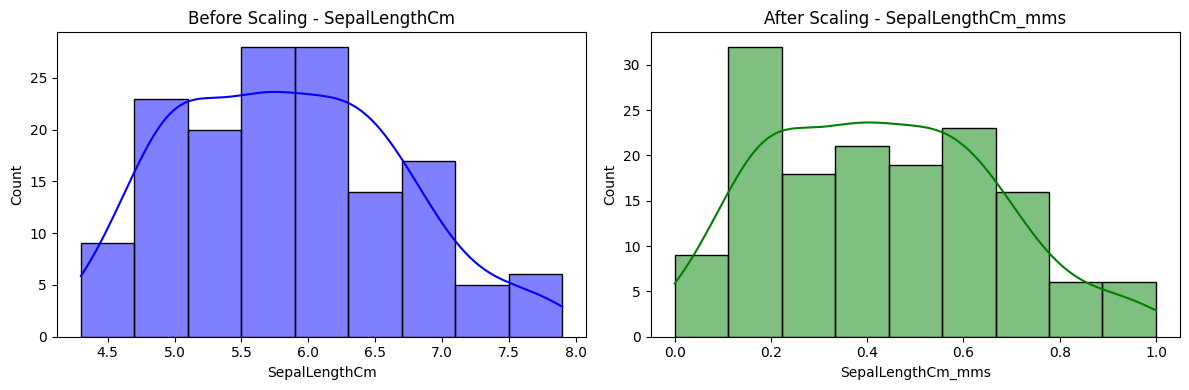

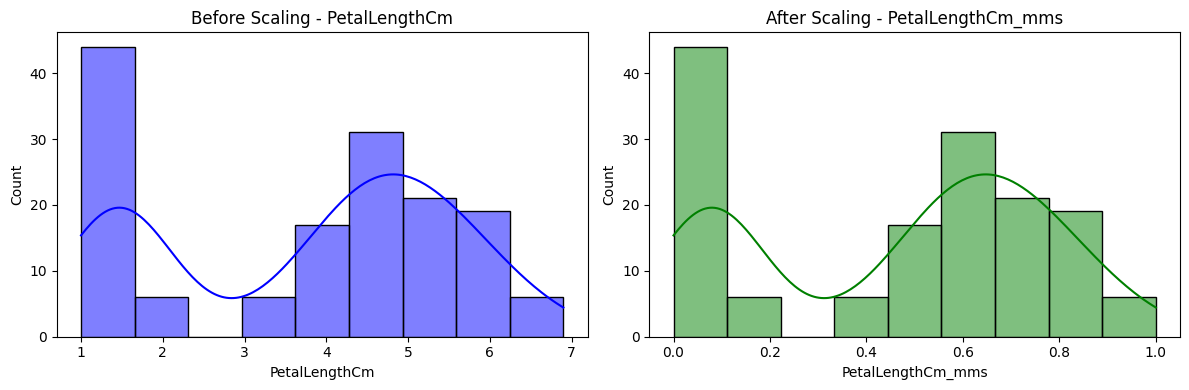

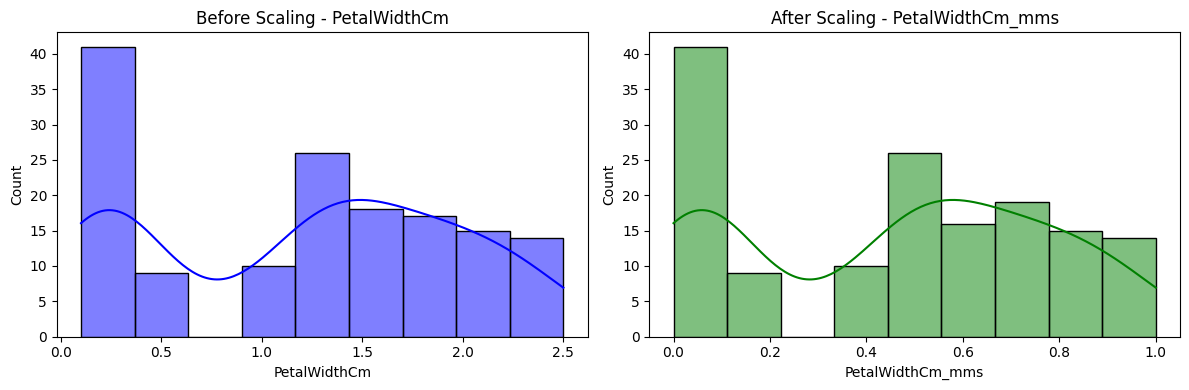

In [34]:
cols = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f"Before Scaling - {col}")
    sns.histplot(df[col], kde=True, color="blue")

    plt.subplot(1, 2, 2)
    plt.title(f"After Scaling - {col}_mms")
    sns.histplot(df[f"{col}_mms"], kde=True, color="green")

    plt.tight_layout()
    plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [37]:
ss.fit(df[["SepalWidthCm"]])

,copy,True
,with_mean,True
,with_std,True


In [38]:
df[["SepalWidthCm_ss"]] = ss.transform(df[["SepalWidthCm"]])

C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_14884\1466414409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SepalWidthCm"])
C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_14884\1466414409.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SepalWidthCm_ss"])


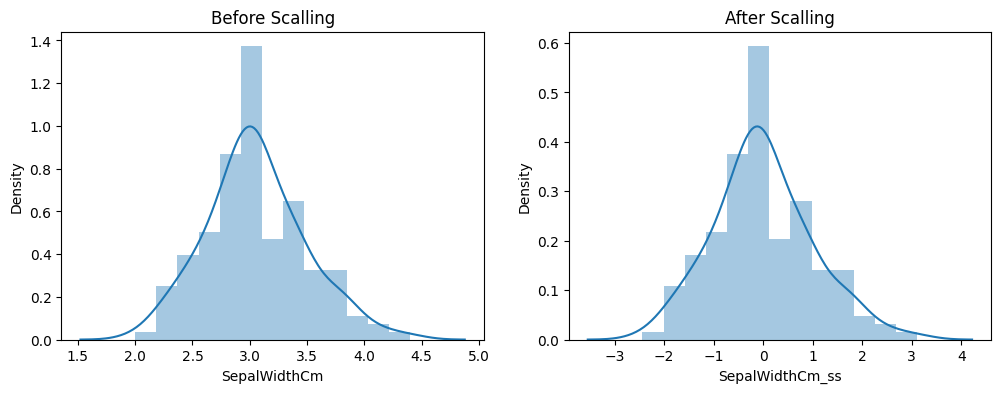

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Before Scalling")
sns.distplot(df["SepalWidthCm"])

plt.subplot(1, 2, 2)
plt.title("After Scalling")
sns.distplot(df["SepalWidthCm_ss"])

plt.show()


In [42]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica,SepalLengthCm_mms,PetalLengthCm_mms,PetalWidthCm_mms,SepalWidthCm_ss
72,6.3,2.5,4.9,1.5,1.0,0.0,0.555556,0.661017,0.583333,-1.281972
48,5.3,3.7,1.5,0.2,0.0,0.0,0.277778,0.084746,0.041667,1.494863
43,5.0,3.5,1.6,0.6,0.0,0.0,0.194444,0.101695,0.208333,1.032057
24,4.8,3.4,1.9,0.2,0.0,0.0,0.138889,0.152542,0.041667,0.800654
139,6.9,3.1,5.4,2.1,0.0,1.0,0.722222,0.745763,0.833333,0.106445
